# Функции в Pandas
Примеры из презентации

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [15]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

,user_id,clicks,orders,calculated
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [16]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [17]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,calculated,watcher
0,1,163,2,False,False
1,2,130,4,False,False
2,3,97,0,True,True


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [18]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [19]:
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
conversion(row1)

0    0.01227
dtype: float64

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [21]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [23]:
df['conversion'] = df.apply(conversion, axis=1)

In [24]:
df[['user_id', 'clicks', 'orders', 'conversion']]

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


### Как создавать столбцы с помощью функций

In [25]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [26]:
df

,user_id
0,1
1,2
2,3


In [28]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [29]:
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


### Анализ рекламных кампаний

In [1]:
import pandas as pd

In [2]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [3]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [4]:
phrase = 'МРТ на Менделеевской от 2000'

In [5]:
len(phrase.split(' '))

5

In [40]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [7]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [30]:
%matplotlib inline

<Axes: >

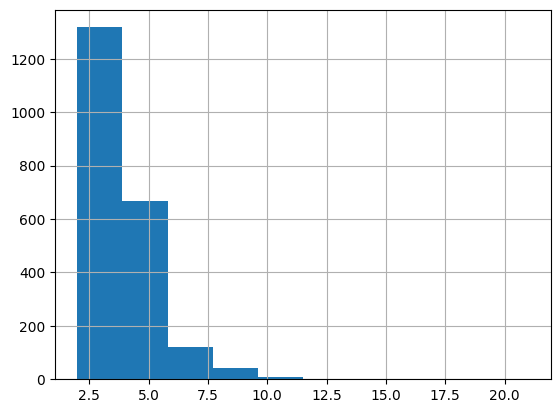

In [31]:
stats['word_count'].hist()

<Axes: >

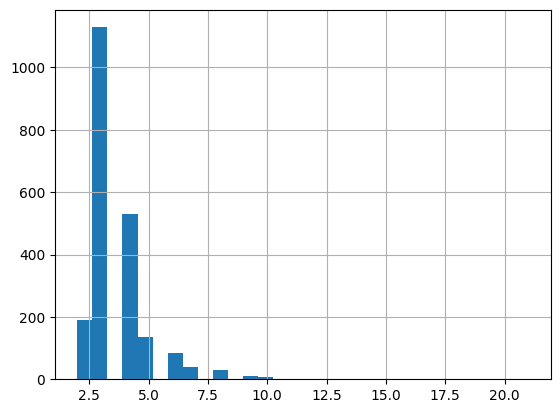

In [32]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [66]:
import pandas as pd
inform_init = pd.read_excel('ad_campaigns.xlsx')
inform_init.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
inform_init['word_count'] = inform_init.apply(lambda word: len(word.phrase.split(' ')), axis=1)
len_phrase = [lambda word: len(word.split(' '))]
inform_init_result = inform_init.value_counts("word_count")
inform_init_result.head(5)

word_count
3    1129
4     529
2     189
5     137
6      84
dtype: int64

In [65]:
inform_init_result = inform_init.value_counts("word_count", normalize=True)
inform_init_result.head(5)

word_count
3    0.522927
4    0.245021
2    0.087541
5    0.063455
6    0.038907
dtype: float64

<Axes: >

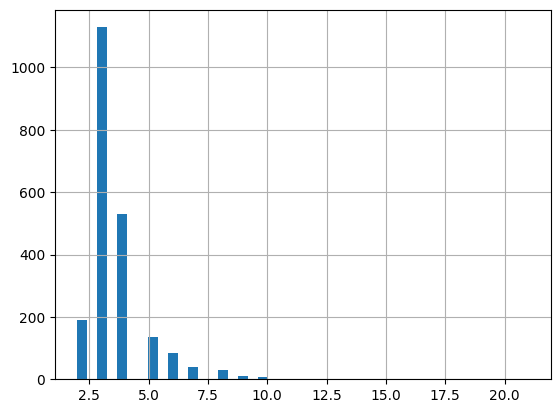

In [49]:
inform_init['word_count'].hist(bins=45)

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [72]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [73]:
from urllib import parse

In [74]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='abc')

In [75]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [76]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [78]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [79]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [82]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [84]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [85]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [86]:
# проверяем датафрейм
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [87]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


### Как передать в функцию несколько аргументов

In [88]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [89]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [45]:
import pandas as pd
inform_init = pd.read_excel('ad_campaigns.xlsx')
inform_init.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']

def detect(row):
    fil = row.group.split(' ')
    if 'мрт' not in fil  and 'МРТ' not in fil and "цмрт" not in fil :
        fil_add = row.text.split('.')
        if '24 часа' in fil_add:
            return True
        return False
    # if "мрт" not in row.group and "24 часа" in row.text:
    #     return True
    # return False
inform_init['counter'] = inform_init.apply(detect, axis=1)
inform_init_add = inform_init['counter'].value_counts()
inform_init_add


True    39
Name: counter, dtype: int64

# Группировки

In [14]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [15]:

df_russia = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'made': ['Италия', 'Япония', 'США', 'Россия', 'Германия'],
                   'category': ['Электроника', 'Авто', 'Бытовая химия', 'Детские товары', 'Игрушки для детей'],
                   'amount': [90, 180, 20, 40, 60]})
df_russia

,order_id,made,category,amount
0,1,Италия,Электроника,90
1,2,Япония,Авто,180
2,3,США,Бытовая химия,20
3,4,Россия,Детские товары,40
4,5,Германия,Игрушки для детей,60


In [16]:
df_china = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'made': ['Китай', 'Китай', 'Китай', 'Китай', 'Китай'],
                   'category': ['Электроника', 'Авто', 'Бытовая химия', 'Детские товары', 'Игрушки для детей'],
                   'amount': [40, 90, 10, 20, 30]})
df_china

,order_id,made,category,amount
0,1,Китай,Электроника,40
1,2,Китай,Авто,90
2,3,Китай,Бытовая химия,10
3,4,Китай,Детские товары,20
4,5,Китай,Игрушки для детей,30


In [26]:
df_china.amount.sum()
df_china.amount.max()
df_china.amount.min()

10

### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [30]:
def statistic(data_f):
    # print(f"Midle {data_f.amount.sum() / len(data_f)}  and differense {data_f.amount.max() - data_f.amount.min()}")
    return data_f.amount.sum() / len(data_f), data_f.amount.max() - data_f.amount.min()
df_china['stat'] = df_china.apply(statistic(df_china), axis=1)
df_china

AssertionError: 

Объединим процесс разбиения на датафреймы

In [ ]:
def groupby_function(data):
    return data.amount.max() - data.amount.min()

In [ ]:
df.groupby('country').apply(groupby_function)

Вернемся к статистике рекламных кампаний

In [ ]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

In [ ]:
# более универсальный способ

stats.groupby('campaign').count().head()

In [ ]:
stats.groupby('campaign').count()[['group', 'effect']].head()

### Как вернуть столбец из индекса - метод reset_index()

In [ ]:
stats.groupby('campaign').count().reset_index().head()

### К группировке можно применять разные функции такие образом:

In [ ]:
obj = stats.groupby('campaign')

In [ ]:
obj.max().head()

In [ ]:
obj.mean().head()

### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [ ]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

In [ ]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

### Как обращаться к вложенным столбцам

In [ ]:
results['effect']['max'].head()

In [ ]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

In [ ]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

In [ ]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 